<a href="https://colab.research.google.com/github/kshitizs11/Fake-News-Prediction-/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://www.dropbox.com/sh/sgz4z89q30rie8z/AAB7hz-vCInyEt3CSX_VJJsYa?dl=0"

--2020-09-29 06:33:08--  https://www.dropbox.com/sh/sgz4z89q30rie8z/AAB7hz-vCInyEt3CSX_VJJsYa?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/sgz4z89q30rie8z/AAB7hz-vCInyEt3CSX_VJJsYa [following]
--2020-09-29 06:33:09--  https://www.dropbox.com/sh/raw/sgz4z89q30rie8z/AAB7hz-vCInyEt3CSX_VJJsYa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc131d4bd8fe1e6d31dc872c5301.dl.dropboxusercontent.com/zip_download_get/AjuzSU7BkcOhd06KnnkA3ahUROmmEAnTlopUX6NbNQ8tiv-nPHm9eyF8AXswDtP3_3jpQB5Gy-lJ_Kx-sDB22CdNULPKTrEJXUVJOKod1PDJ-g [following]
--2020-09-29 06:33:09--  https://uc131d4bd8fe1e6d31dc872c5301.dl.dropboxusercontent.com/zip_download_get/AjuzSU7BkcOhd06KnnkA3ahUROmmEAnTlopUX6NbNQ8tiv-nPHm9eyF8AXswDtP3_3jpQB5Gy-lJ_Kx-sDB2

In [ ]:
!unzip AAB7hz-vCInyEt3CSX_VJJsYa?dl=0

Archive:  AAB7hz-vCInyEt3CSX_VJJsYa?dl=0
mapname:  conversion of  failed
 extracting: test.csv                
 extracting: train.csv               
 extracting: Fake News.ipynb         
   creating: 8542_11957_compressed_glove.6B.50d.txt/
 extracting: .ipynb_checkpoints/Fake News-checkpoint.ipynb  
 extracting: fake_news_classification_ai_challenge-dataset.zip  
 extracting: 8542_11957_compressed_glove.6B.50d.txt/glove.6B.50d.txt  

1 archive had fatal errors.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import gensim
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train

,index,title,text,subject,date,class,Unnamed: 6
0,0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,"Aug 2, 2017",Fake,NaN
1,1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,"Oct 4, 2016",Fake,NaN
2,2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,"February 13, 2016",Fake,NaN
3,3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,"November 9, 2016",Real,NaN
4,4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 26, 2017",Real,NaN
...,...,...,...,...,...,...,...
39995,39995,U.S. officials step up rhetoric on Russia link...,(Reuters) - Republican vice presidential candi...,politicsNews,"October 16, 2016",Real,NaN
39996,39996,McDonald’s Manager To Hispanic Customer: ‘Can...,An employee working at a North Carolina McDona...,News,"September 13, 2017",Fake,NaN
39997,39997,SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...,Tucker to sanctuary city supporter: how did a ...,politics,"Mar 29, 2017",Fake,NaN
39998,39998,Robert Parry: Sorting Out the Russia Mess,Consortium News Exclusive: The U.S. mainstream...,US_News,"October 31, 2017",Fake,NaN


In [ ]:
train.columns

Index(['index', 'title', 'text', 'subject', 'date', 'class', 'Unnamed: 6'], dtype='object')

In [ ]:
y_train = train["class"]
train.drop(columns=["class","Unnamed: 6"],inplace=True)

In [ ]:
y = y_train
np.unique(y,return_counts=True)

(array(['Fake', 'February 5, 2017', 'Real'], dtype=object),
 array([20886,     1, 19113]))

In [ ]:
train[y=="February 5, 2017"]

,index,title,text,subject,date
504,504,Even Mitch McConnell Is Beginning To Turn On ...,Is Impeachment Next? (VIDEO),Donald Trump s Muslim ban is proving to be a l...,News


In [ ]:
y_train[504]

'February 5, 2017'

In [ ]:
train.shape

(40000, 5)

In [ ]:
y_train[504] = "Real"

In [ ]:
train.drop(columns=["index"],inplace=True)

In [ ]:
test.drop(columns=["index"],inplace=True)

In [ ]:
for i in range(train.shape[0]):
    train["date"].iloc[i]=train["date"].iloc[i].split(",")[-1]

In [ ]:
for i in range(test.shape[0]):
    test["date"].iloc[i]=test["date"].iloc[i].split(",")[-1]

In [ ]:
train["Year"]=train["date"]
train.drop(columns=["date"],inplace=True)

In [ ]:
test["Year"]=test["date"]
test.drop(columns=["date"],inplace=True)

In [ ]:
train

,title,text,subject,class,Year
0,PRESIDENT TRUMP Explains New “America First” R...,That s what we re talking about! Another campa...,politics,Fake,2017
1,TERMINALLY ILL FORMER MISS WI: “Until my last ...,How is it that Sean Hannity is the only media ...,politics,Fake,2016
2,Cruz Humiliated By Moderator After Lie About ...,Almost immediately after learning that longtim...,News,Fake,2016
3,"Russia revels in Trump victory, looks to sanct...",MOSCOW (Reuters) - For all their mutual praise...,politicsNews,Real,2016
4,Trump's bid to open U.S. monuments to developm...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,Real,2017
...,...,...,...,...,...
39995,U.S. officials step up rhetoric on Russia link...,(Reuters) - Republican vice presidential candi...,politicsNews,Real,2016
39996,McDonald’s Manager To Hispanic Customer: ‘Can...,An employee working at a North Carolina McDona...,News,Fake,2017
39997,SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...,Tucker to sanctuary city supporter: how did a ...,politics,Fake,2017
39998,Robert Parry: Sorting Out the Russia Mess,Consortium News Exclusive: The U.S. mainstream...,US_News,Fake,2017


In [ ]:
test

,title,text,subject,Year
0,STUNNING TESTIMONY On The Devastation Illegal ...,Fantastic testimony on the disastrous results...,Government News,2016
1,Pena Nieto told Trump Mexico won't pay for wal...,MEXICO CITY (Reuters) - Mexican President Enri...,politicsNews,2016
2,"Actor George Clooney: I Support Hillary, And ...",Hillary Clinton has picked up a huge endorseme...,News,2016
3,AWESOME LETTER TO OBAMA: Who is unfit to be pr...,Did anyone else think it was the ultimate iron...,left-news,2016
4,This Ridiculously Creepy Vine May Prove Ted C...,There have been a lot of strange this that hav...,News,2016
...,...,...,...,...
3995,WHERE’S THE OVERSIGHT? OBAMA FUNNELED BILLIONS...,Advocates for big government and progressive ...,Government News,2017
3996,"Trump says he is 'very, very close' to making ...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,2017
3997,NSA Chief On Trump’s Russia/US Cybersecurity ...,It doesn t take a rocket scientist to know tha...,News,2017
3998,Chris Christie Says Only Stupid Judges Will W...,"On New Jersey 101.5, Chris Christie made the a...",News,2016


In [ ]:
train.isnull().sum()

title      0
text       0
subject    0
class      0
Year       0
dtype: int64

In [ ]:
test.isnull().sum()

title      0
text       0
subject    0
Year       0
dtype: int64

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
x_train = train.values
x_test = test.values
y_train = y_train.values

In [ ]:
x_train.shape

(40000, 5)

In [ ]:
my_regex_tokenizer = RegexpTokenizer(pattern="[a-zA-Z]+")

# Stop Words Removal For Train Data

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
sw = stopwords.words("english")

In [ ]:
train["title"]

0        PRESIDENT TRUMP Explains New “America First” R...
1        TERMINALLY ILL FORMER MISS WI: “Until my last ...
2         Cruz Humiliated By Moderator After Lie About ...
3        Russia revels in Trump victory, looks to sanct...
4        Trump's bid to open U.S. monuments to developm...
                               ...                        
39995    U.S. officials step up rhetoric on Russia link...
39996     McDonald’s Manager To Hispanic Customer: ‘Can...
39997    SMUG LIBERAL LAW PROFESSOR SHUT DOWN BY TUCKER...
39998            Robert Parry: Sorting Out the Russia Mess
39999    Israeli missiles hit military post near Damasc...
Name: title, Length: 40000, dtype: object

# Stopwords From News

In [ ]:
news = []
for i in range(0,x_train.shape[0]):
    value = " ".join([w for w in word_tokenize(x_train[i][1].lower()) if w not in sw])
    news.append(value)

In [ ]:
news[0]

'talking ! another campaign promise kept . wonder democrats media allies fear president trump . last time politician actually followed promise made american voters helped get elected ? president trump joined two republican senators wednesday champion legislation overhauling legal immigration america , calling merit-based system would significantly cut admissions next decade.speaking white house , president called significant reform immigration system half century . candidate , campaigned creating merit-based immigration system protects u.s. workers taxpayers , today , trump said.he joined georgia sen. david perdue arkansas sen. tom cotton , republicans first introduced reforming american immigration strong economy , raise act , february . said legislation aims reduce number green cards issued half 1 million 500,000 year.trump , perdue cotton argued tuesday low-skilled unskilled immigration united states depressed wages.according fact sheet released reporters , new system would favor im

In [ ]:
news_token = []
for i in range(0,x_train.shape[0]):
    value = " ".join(my_regex_tokenizer.tokenize(news[i].lower()))
    value = value.split()
    value = [s for s in value if len(s)>1]
    value = " ".join(value)
    news_token.append(value)

# Title Tokenization and Stopwords

In [ ]:
title = []
for i in range(0,x_train.shape[0]):
    value = " ".join([w for w in word_tokenize(x_train[i][0].lower()) if w not in sw])
    title.append(value)

In [ ]:
title_token = []
for i in range(0,x_train.shape[0]):
    value = " ".join(my_regex_tokenizer.tokenize(title[i].lower()))
    value = value.split()
    value = [s for s in value if len(s)>1]
    value = " ".join(value)
    title_token.append(value)

# Subject Token

In [ ]:
subject_token = []
for j in range(0,x_train.shape[0]):
    value = " ".join(my_regex_tokenizer.tokenize(x_train[j][2].lower()))
    subject_token.append(value)

# Now Dealing With Test Data

# News Stop words and tokenization

In [ ]:
news_test = []
for i in range(0,x_test.shape[0]):
    value = " ".join([w for w in word_tokenize(x_test[i][1].lower()) if w not in sw])
    news_test.append(value)

In [ ]:
news_test_token = []
for i in range(0,x_test.shape[0]):
    value = " ".join(my_regex_tokenizer.tokenize(news_test[i].lower()))
    value = value.split()
    value = [s for s in value if len(s)>1]
    value = " ".join(value)
    news_test_token.append(value)

# Title Stopwords And Tokenization

In [ ]:
title_test = []
for i in range(0,x_test.shape[0]):
    value = " ".join([w for w in word_tokenize(x_test[i][0].lower()) if w not in sw])
    title_test.append(value)

In [ ]:
title_test_token = []
for i in range(0,x_test.shape[0]):
    value = " ".join(my_regex_tokenizer.tokenize(title_test[i].lower()))
    value = value.split()
    value = [s for s in value if len(s)>1]
    value = " ".join(value)
    title_test_token.append(value)

# Subject Tokenization

In [ ]:
subject_test_token = []
for j in range(0,x_test.shape[0]):
    value = " ".join(my_regex_tokenizer.tokenize(x_test[j][2].lower()))
    subject_test_token.append(value)

In [ ]:
import gensim
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import nltk
import matplotlib.pyplot as plt

# Testing Size For Training Data

### News

In [ ]:
len_sen = []
for i in range(x_train.shape[0]):
#     print(x_train[i][1].split())
    len_sen.append(len(news_token[i].split()))

In [ ]:
np.average(len_sen)

234.08545

In [ ]:
max(len_sen)

5050

(array([3.7647e+04, 2.0930e+03, 1.4100e+02, 5.2000e+01, 3.8000e+01,
        4.0000e+00, 1.3000e+01, 4.0000e+00, 2.0000e+00, 6.0000e+00]),
 array([   0.,  505., 1010., 1515., 2020., 2525., 3030., 3535., 4040.,
        4545., 5050.]),
 <a list of 10 Patch objects>)

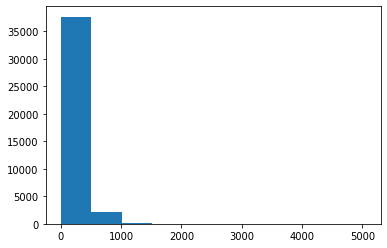

In [ ]:
plt.hist(len_sen)

### Title

In [ ]:
len_sen1 = []
for i in range(x_train.shape[0]):
#     print(x_train[i][0].split())
    len_sen1.append(len(title_token[i].split()))

In [ ]:
np.average(len_sen1)

9.3408

In [ ]:
max(len_sen1)

30

(array([6.9000e+01, 3.9650e+03, 2.1166e+04, 9.9850e+03, 2.9780e+03,
        1.2750e+03, 4.0900e+02, 1.2100e+02, 3.0000e+01, 2.0000e+00]),
 array([ 1. ,  3.9,  6.8,  9.7, 12.6, 15.5, 18.4, 21.3, 24.2, 27.1, 30. ]),
 <a list of 10 Patch objects>)

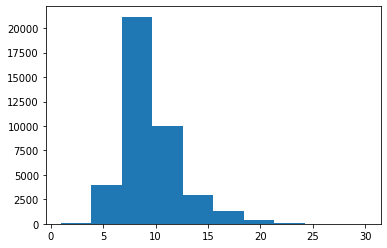

In [ ]:
plt.hist(len_sen1)

# Glove

In [ ]:
f = open("./8542_11957_compressed_glove.6B.50d.txt/glove.6B.50d.txt",encoding='utf8')

In [ ]:
embedding = {}
for line in f:
    values = line.split()
    word = values[0]
    emb = np.array(values[1:],dtype="float")
    embedding[word] = emb

# Embedding Matrix For News

In [ ]:
def get_embedding_index_news(x):
    maxlen = 100
    embedding_output = np.zeros((len(x),maxlen,50))
    x1 = []
    for i in range(len(x)):
        x1.append(x[i].split())
        if len(x1[i])>100:
            x1[i] = x1[i][:100]
        for j in range(len(x1[i])):
            if embedding.get(x1[i][j]) is not None:
                embedding_output[i][j] = embedding[x1[i][j].lower()]
                
    return embedding_output

# Embedding Matrix For Title

In [ ]:
def get_embedding_index_title(x):
    maxlen = 15
    embedding_output = np.zeros((len(x),maxlen,50))
    x1 = []
    for i in range(len(x)):
        x1.append(x[i].split())
        if len(x1[i])>15:
            x1[i] = x1[i][:15]
        for j in range(len(x1[i])):
            if embedding.get(x1[i][j]) is not None:
                embedding_output[i][j] = embedding[x1[i][j].lower()]
                
    return embedding_output

# Embedding For Subject

In [ ]:
def get_embedding_index_subject(x):
    maxlen = 2
    embedding_output = np.zeros((len(x),maxlen,50))
    x1 = []
    for i in range(len(x)):
        x1.append(x[i].split())
        if len(x1[i])>2:
            x1[i] = x1[i][:2]
        for j in range(len(x1[i])):
            if embedding.get(x1[i][j]) is not None:
                embedding_output[i][j] = embedding[x1[i][j].lower()]
                
    return embedding_output

In [ ]:
# news_token = np.array(news_token)
# news_test_token = np.array(news_test_token)

In [ ]:
# subject_test_token = np.array(subject_test_token)
# subject_token = np.array(subject_token)

In [ ]:
# title_token = np.array(title_token)
# title_test_token = np.array(title_test_token)

# Train Embedding

In [ ]:
train_embedding_news = get_embedding_index_news(news_token)

In [ ]:
test_embedding_news = get_embedding_index_news(news_test_token)

In [ ]:
train_embedding_title = get_embedding_index_title(title_token)

In [ ]:
test_embedding_title = get_embedding_index_title(title_test_token)

In [ ]:
train_embedding_subject = get_embedding_index_subject(subject_token)

In [ ]:
test_embedding_subject = get_embedding_index_subject(subject_test_token)

# Train Size

In [ ]:
train_embedding_news.shape,train_embedding_subject.shape,train_embedding_title.shape

((40000, 100, 50), (40000, 2, 50), (40000, 15, 50))

# Test Size

In [ ]:
test_embedding_news.shape,test_embedding_title.shape,test_embedding_subject.shape

((4000, 100, 50), (4000, 15, 50), (4000, 2, 50))

# Combining Train Embedding

In [ ]:
x_train_embedding = np.hstack((train_embedding_news,train_embedding_title))

In [ ]:
x_train_embedding = np.hstack((x_train_embedding,train_embedding_subject))

In [ ]:
x_train_embedding.shape

(40000, 117, 50)

# Combining test embedding

In [ ]:
x_test_embedding = np.hstack((test_embedding_news,test_embedding_title))

In [ ]:
x_test_embedding = np.hstack((x_test_embedding,test_embedding_subject))

In [ ]:
x_test_embedding.shape

(4000, 117, 50)

# Converting To Categorical Features

In [ ]:
from sklearn import preprocessing

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
y_train = le.fit_transform(y_train)

In [ ]:
y_train.shape

(40000,)

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
y_train.shape

(40000, 2)

# By Using RNN

In [ ]:
from keras.layers import *
from keras.models import Model,Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units=32,input_shape=(117,50),return_sequences=True))
model.add(LSTM(units=32,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
# model.add(LSTM(units=64,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=32,return_sequences=True))
model.add(Dense(units=32,activation="tanh"))
model.add(Dropout(0.1))
model.add(Dense(units=32,activation="tanh"))
model.add(Dense(units=2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 117, 32)           10624     
_________________________________________________________________
lstm_10 (LSTM)               (None, 117, 32)           8320      
_________________________________________________________________
dropout_6 (Dropout)          (None, 117, 32)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                24832     
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)               

In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
hist = model.fit(x_train_embedding,y_train,validation_split=0.2,shuffle =True,batch_size=32,epochs=75)

Epoch 1/75
1000/1000 [==============================] - 117s 117ms/step - loss: 0.0447 - accuracy: 0.9800 - val_loss: 1.2332e-04 - val_accuracy: 1.0000
Epoch 2/75
 182/1000 [====>.........................] - ETA: 1:30 - loss: 1.3718e-04 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [ ]:
x_train_embedding.shape,y_train.shape

((40000, 117, 50), (40000, 2))

In [ ]:
y_pred = model.predict_classes(x_test_embedding)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
np.unique(y_pred)

array([0, 1])

In [ ]:
pred = []
for i in range(y_pred.shape[0]):
  if y_pred[i]==0:
    pred.append("Fake")
  else:
    pred.append("Real")

In [ ]:
pred = np.array(pred)

In [ ]:
index = []
for i in range(0,pred.shape[0]):
  index.append(i)

In [ ]:
index = np.array(index)

In [ ]:
index = index.reshape(index.shape[0],1)
pred = pred.reshape(pred.shape[0],1)

In [ ]:
index.shape,pred.shape

((4000, 1), (4000, 1))

In [ ]:
y_prediction = np.hstack((index,pred))

In [ ]:
y_prediction

array([['0', 'Fake'],
       ['1', 'Real'],
       ['2', 'Fake'],
       ...,
       ['3997', 'Fake'],
       ['3998', 'Fake'],
       ['3999', 'Fake']], dtype='<U21')

In [ ]:
df = pd.DataFrame(data=y_prediction, columns=['index',"class"])
df.to_csv("Fake_News_prediction.csv", index=False)